In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from pandas.io.json import json_normalize

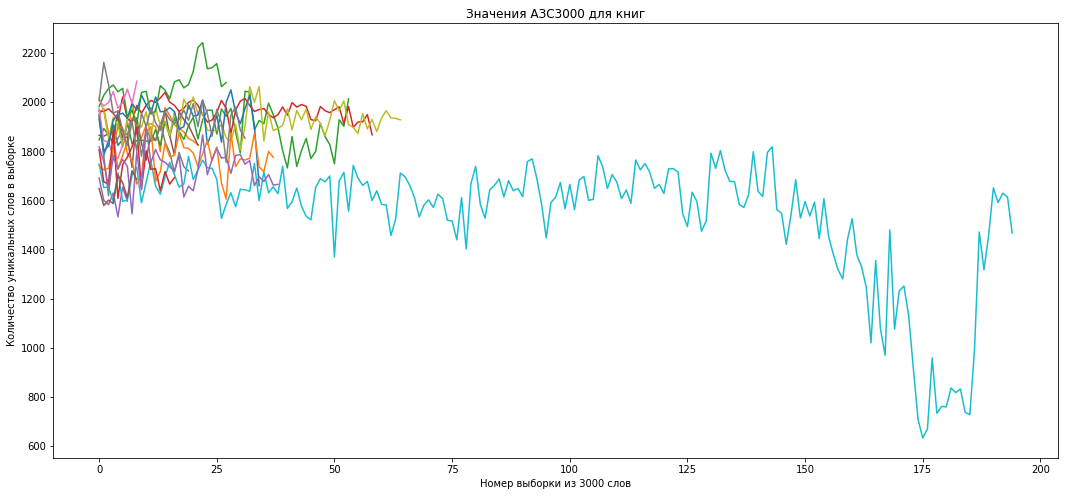

In [2]:
# Открываем JSON с данными по книгам и загружаем из него данные
path = os.path.abspath('C:\\Users\\home\\PycharmProjects\\hello_collections\\books_information.json')
with open(path, 'r', encoding='utf-8') as data:
    books_info = json.load(data)

# Для каждой книги выводим график разброса АЗС3000
for book in books_info:    
    numbers = [int(i) for i in book['АЗС3000'].keys()]
    values = list(book['АЗС3000'].values())
    plt.rcParams['figure.figsize'] = [18, 8]
    plt.title('Значения АЗС3000 для книг')
    plt.xlabel('Номер выборки из 3000 слов')
    plt.ylabel('Количество уникальных слов в выборке')
    plt.plot(numbers, values)

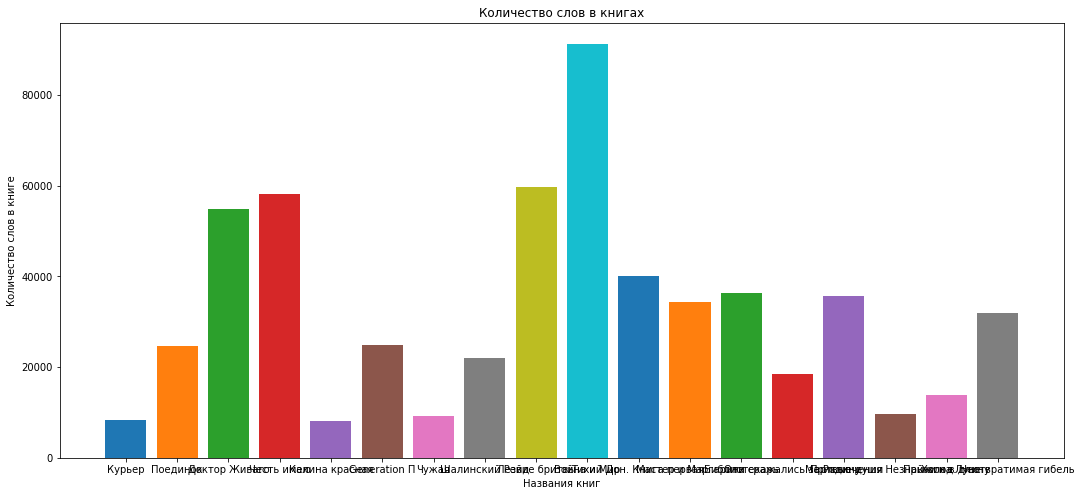

In [3]:

def plot_bar(xparam, yparam, plot_title, xlabel, ylabel):
    # Функция, которая выводит столбчатый график с данными по книгам, соответствующими переданным параметрам
    for book in books_info:
        x = []
        y = []
        x.append(book[xparam])
        y.append(book[yparam])
        plt.title(plot_title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.bar(x, y)
        
# Выводим столбчатый график с количеством слов для каждой книги        
plot_bar('НазваниеКниги', 'КоличествоСловТочно', 'Количество слов в книгах', 'Названия книг', 'Количество слов в книге')

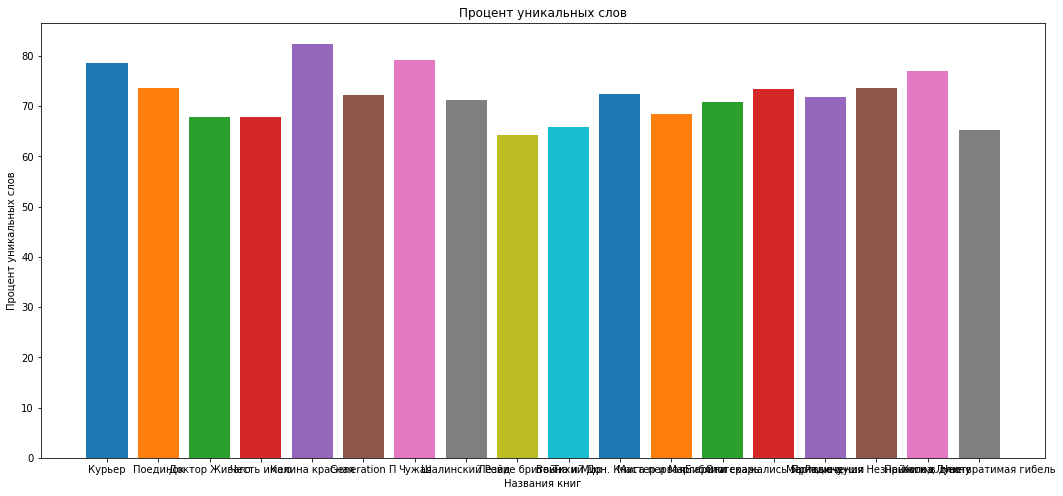

In [4]:
# Выводим столбчатый график с процентом уникальных слов
plot_bar('НазваниеКниги', 'ПроцентУникальныхСлов', 'Процент уникальных слов', 'Названия книг', 'Процент уникальных слов')

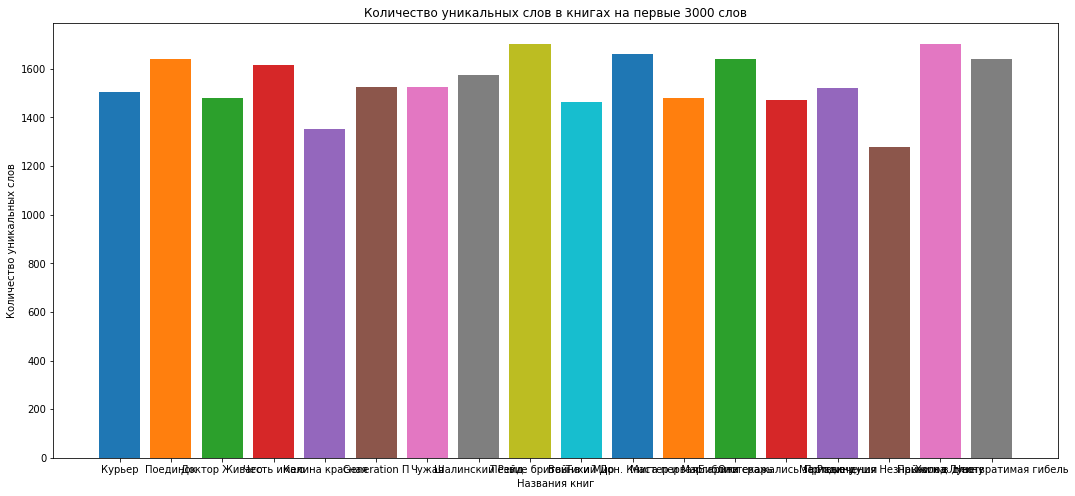

In [5]:
# Выводим столбчатый график с количеством уникальных слов на первые 3000 слов для каждой книги
plot_bar('НазваниеКниги', 'КоличествоУникальныхСловНа3000', 'Количество уникальных слов в книгах на первые 3000 слов', 'Названия книг', 'Количество уникальных слов')

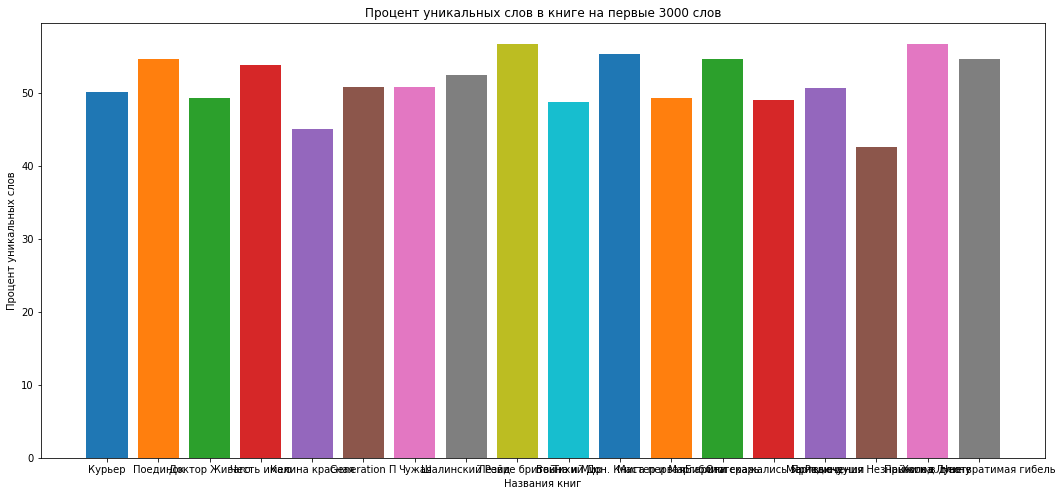

In [6]:
# Выводим столбчатый график с процентом уникальных слов на первые 3000 слов для каждой книги
plot_bar('НазваниеКниги', 'ПроцентУникальныхСловНа3000', 'Процент уникальных слов в книге на первые 3000 слов', 'Названия книг', 'Процент уникальных слов')

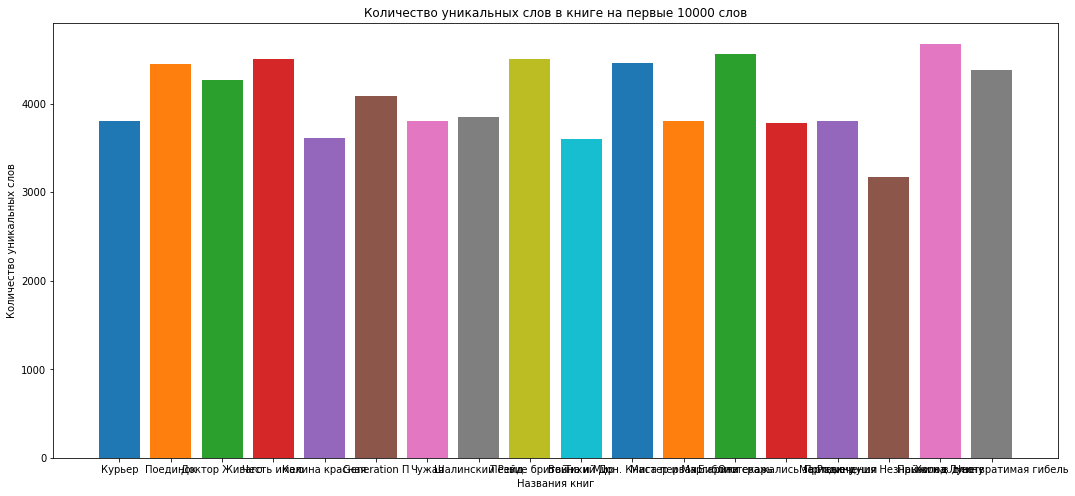

In [7]:
# Выводим столбчатый график с количеством уникальных слов на первые 10000 слов для каждой книги
plot_bar('НазваниеКниги', 'КоличествоУникальныхСловНа10000', 'Количество уникальных слов в книге на первые 10000 слов', 'Названия книг', 'Количество уникальных слов')

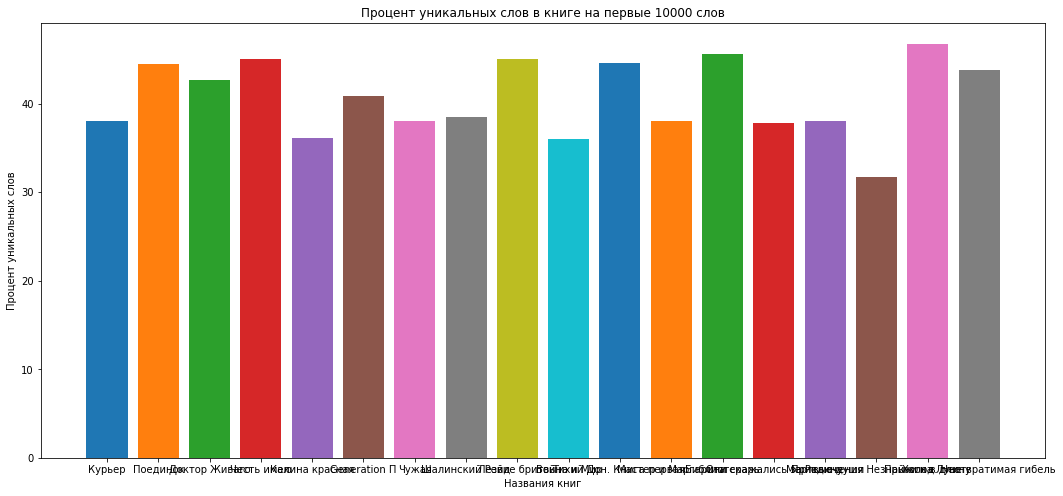

In [8]:
# Выводим столбчатый график с процентом уникальных слов на первые 10000 слов для каждой книги
plot_bar('НазваниеКниги', 'ПроцентУникальныхСловНа10000', 'Процент уникальных слов в книге на первые 10000 слов', 'Названия книг', 'Процент уникальных слов')

In [9]:
# Функция, которая строит круговую диаграмму отображающую процентное соотношение частей речи в произведении.
def plot_pie(book_name=str):
    labels = [
        'Существительные',
        'Прилагательные',
        'Глаголы',
        'Остальные части речи'
    ]
    values = []
    for book in books_info:
        if book['НазваниеКниги'] == book_name:
            values.append(book['ПроцентСуществительных'])
            values.append(book['ПроцентПрилагательных'])
            values.append(book['ПроцентГлаголов'])
            values.append(book['ПроцентОстальныхЧастейРечи'])
    explode = (0, 0, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax1.axis('equal')
    plt.show()

Диаграмма распределения частей речи для книги Курьер.


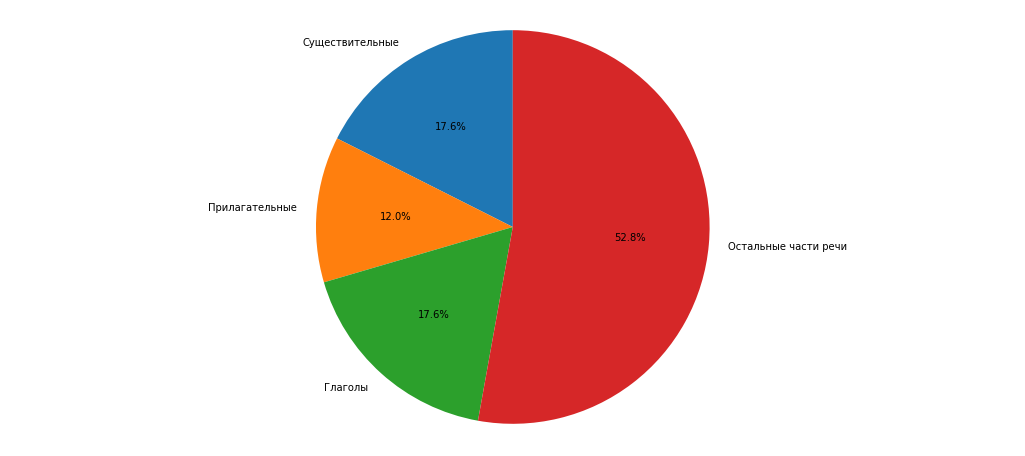

Диаграмма распределения частей речи для книги Поединок.


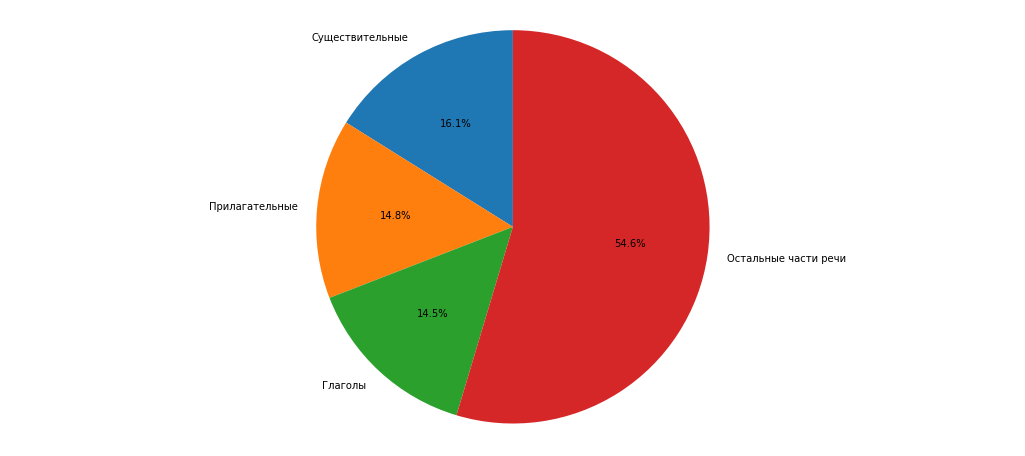

Диаграмма распределения частей речи для книги Доктор Живаго.


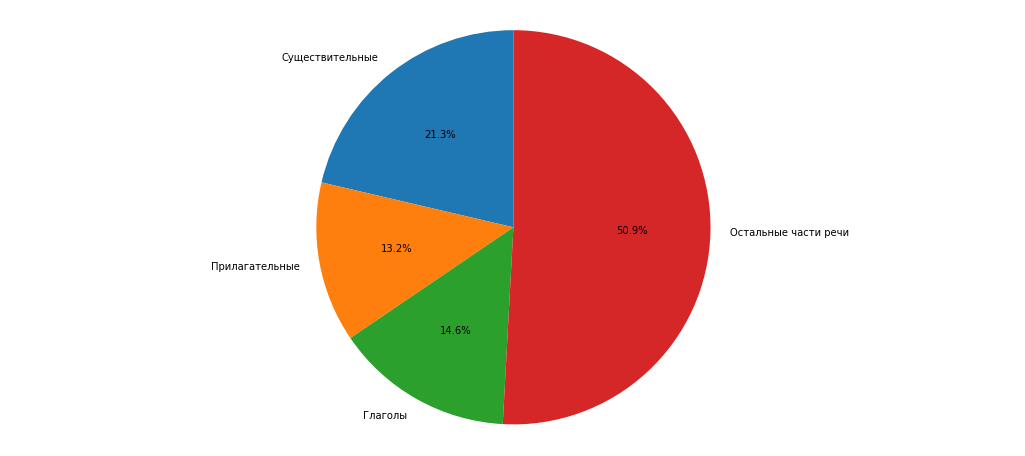

Диаграмма распределения частей речи для книги Честь имею.


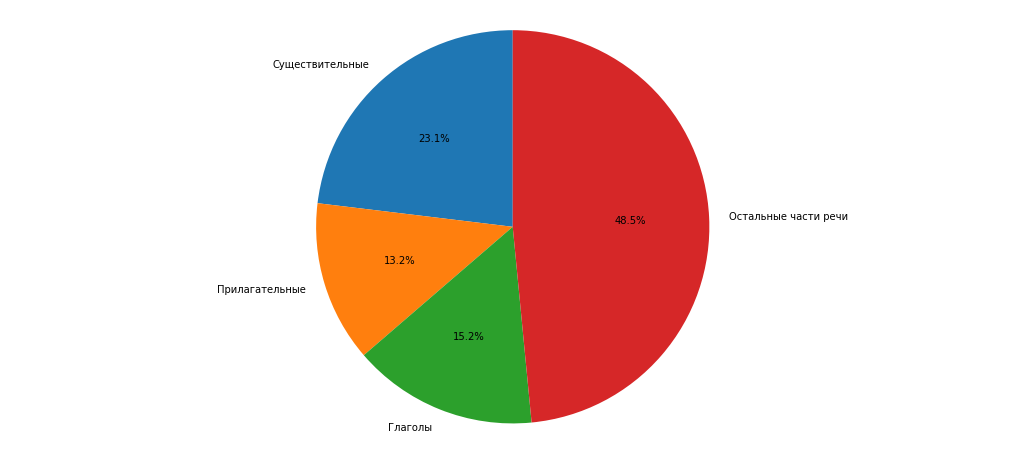

Диаграмма распределения частей речи для книги Калина красная.


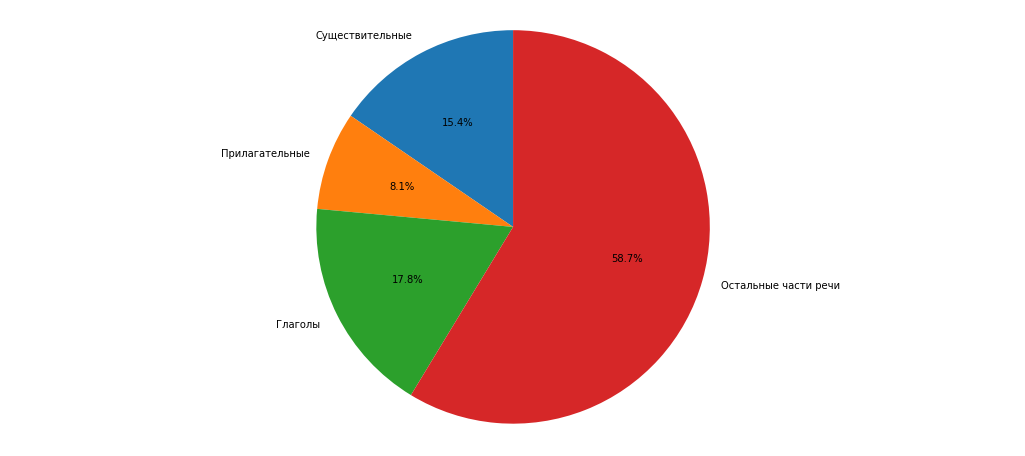

Диаграмма распределения частей речи для книги Generation П.


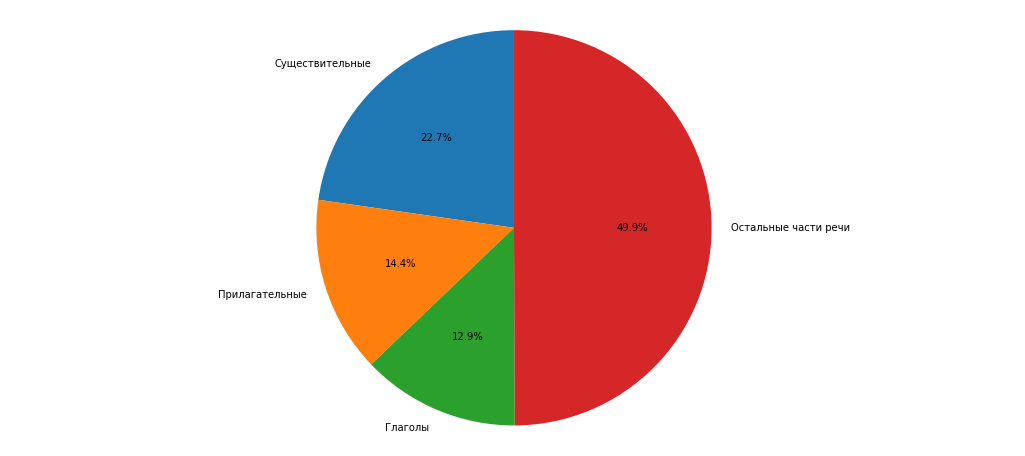

Диаграмма распределения частей речи для книги Чужая.


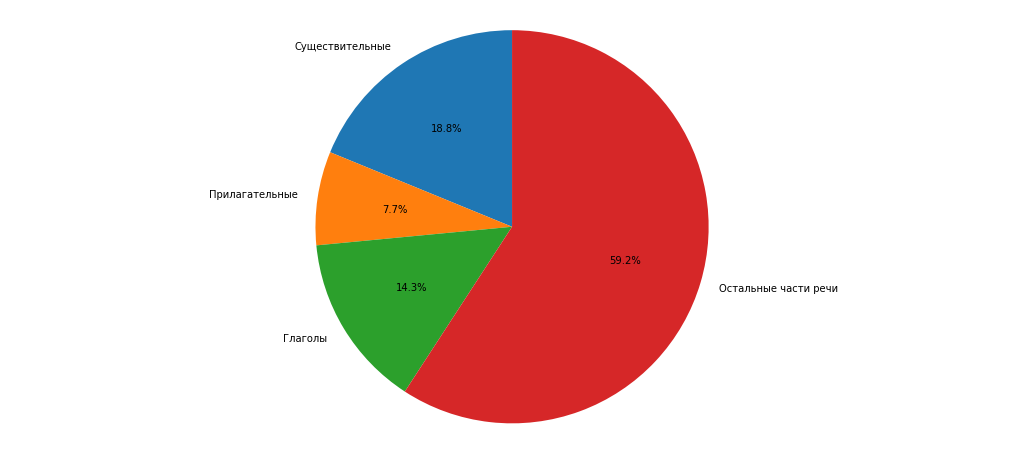

Диаграмма распределения частей речи для книги Шалинский Рейд.


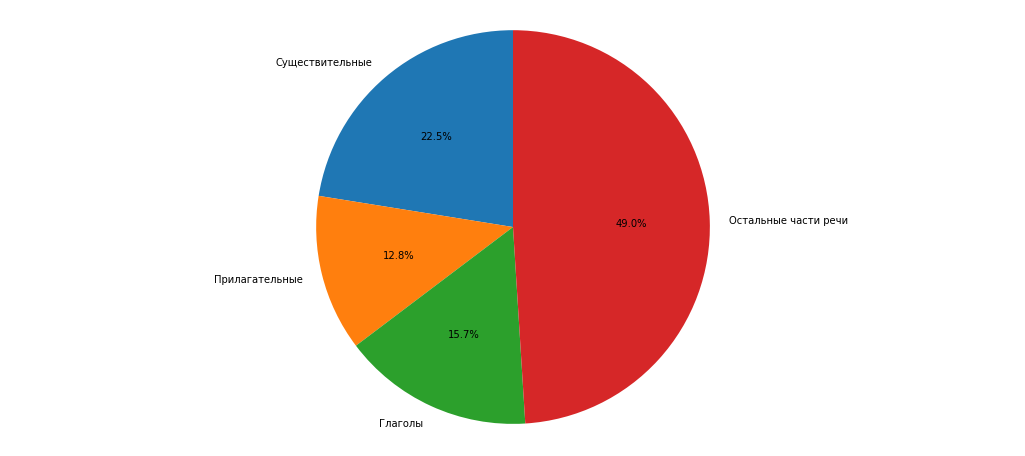

Диаграмма распределения частей речи для книги Лезвие бритвы.


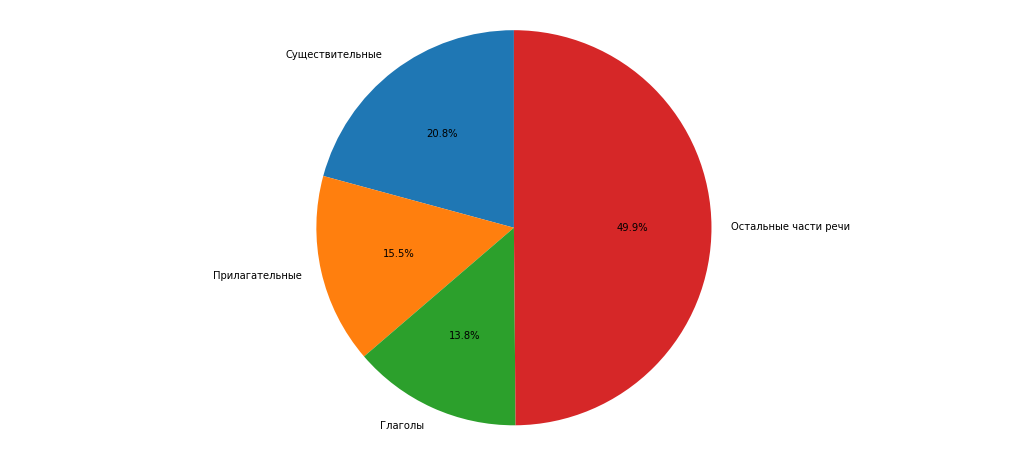

Диаграмма распределения частей речи для книги Война и Мир.


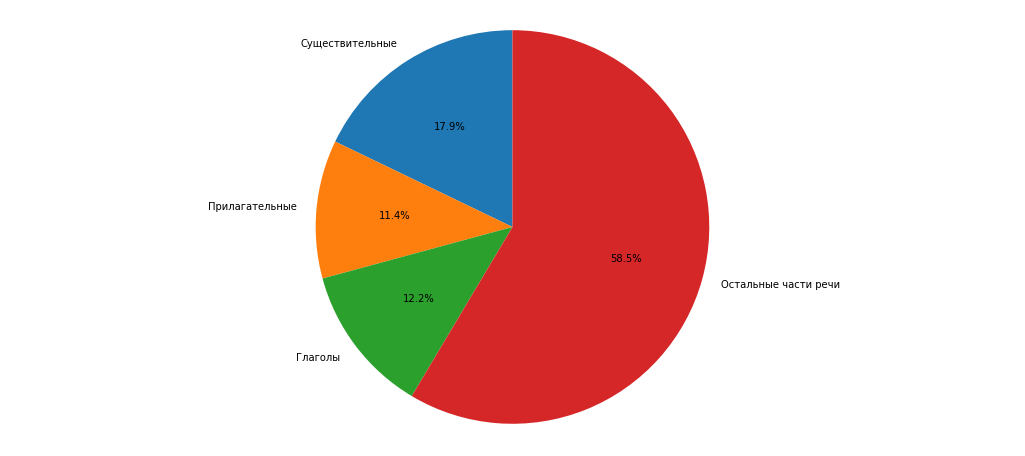

Диаграмма распределения частей речи для книги Тихий Дон. Книга первая..


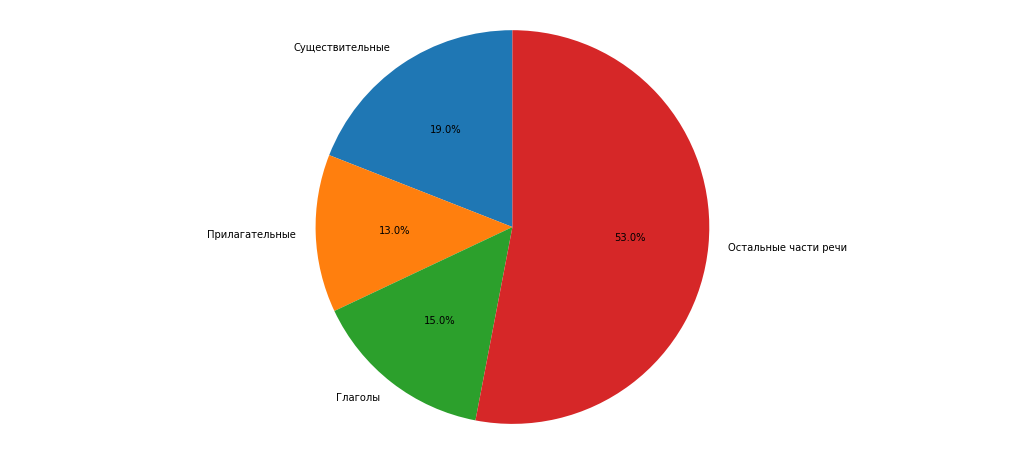

Диаграмма распределения частей речи для книги Мастер и Маргарита.


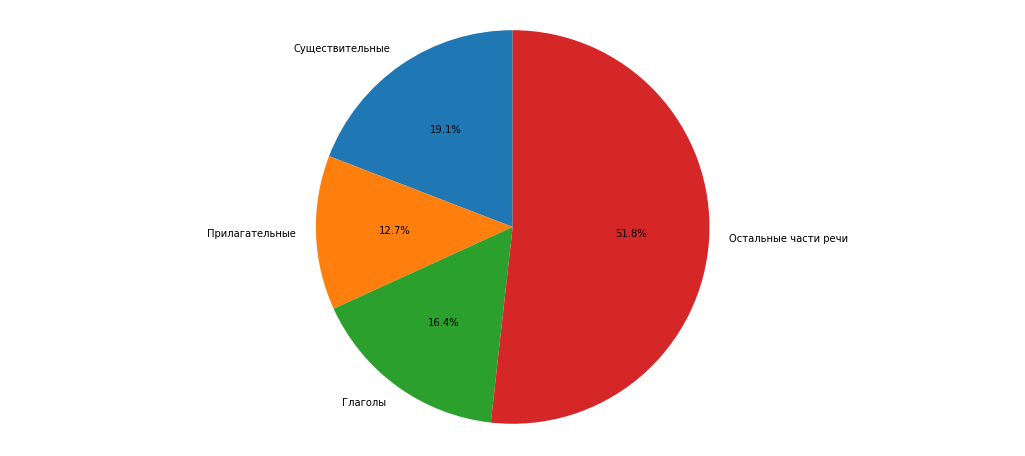

Диаграмма распределения частей речи для книги Библиотекарь.


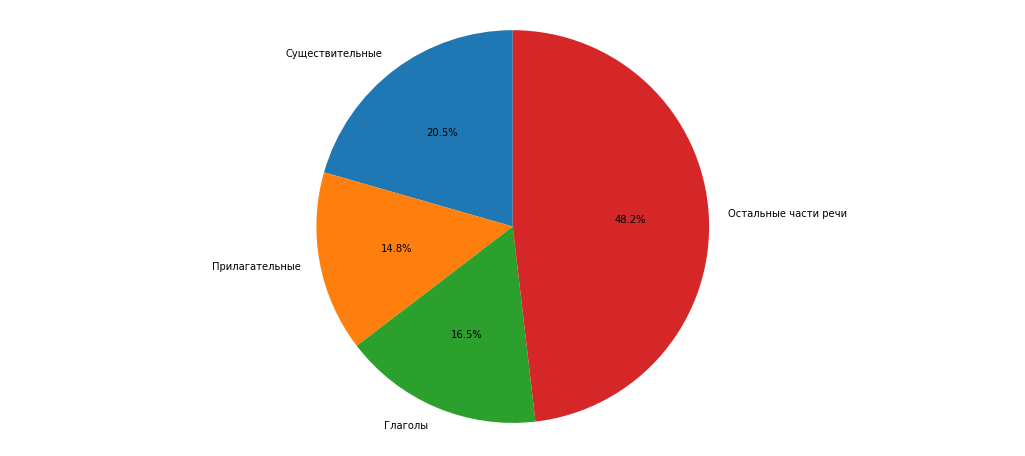

Диаграмма распределения частей речи для книги Они сражались за Родину.


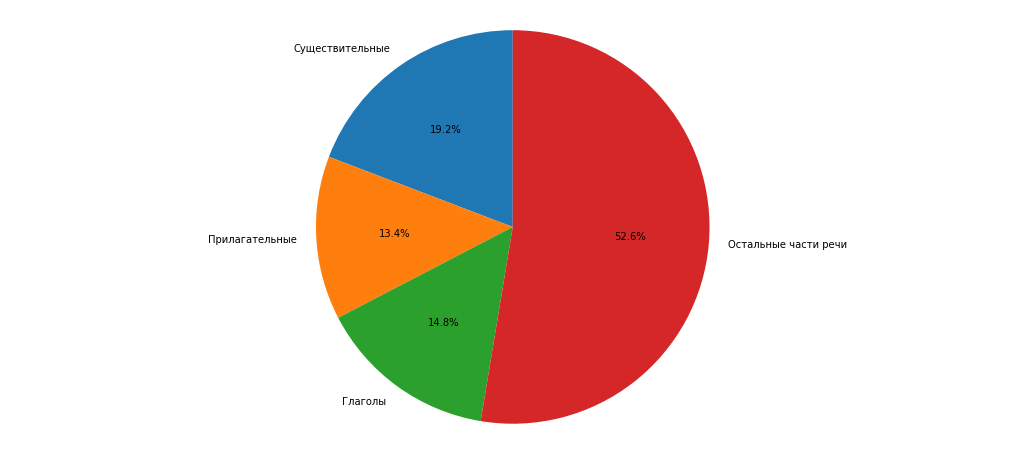

Диаграмма распределения частей речи для книги Мертвые души.


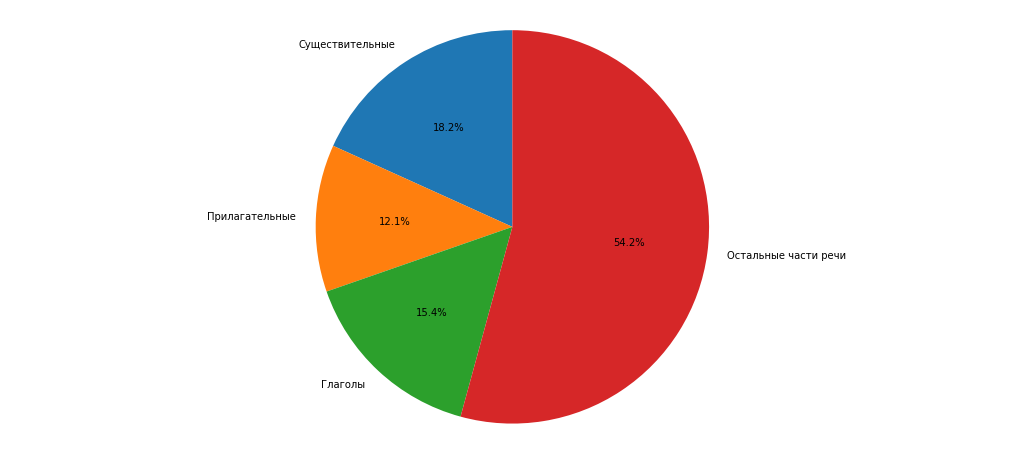

Диаграмма распределения частей речи для книги Приключения Незнайки на Луне.


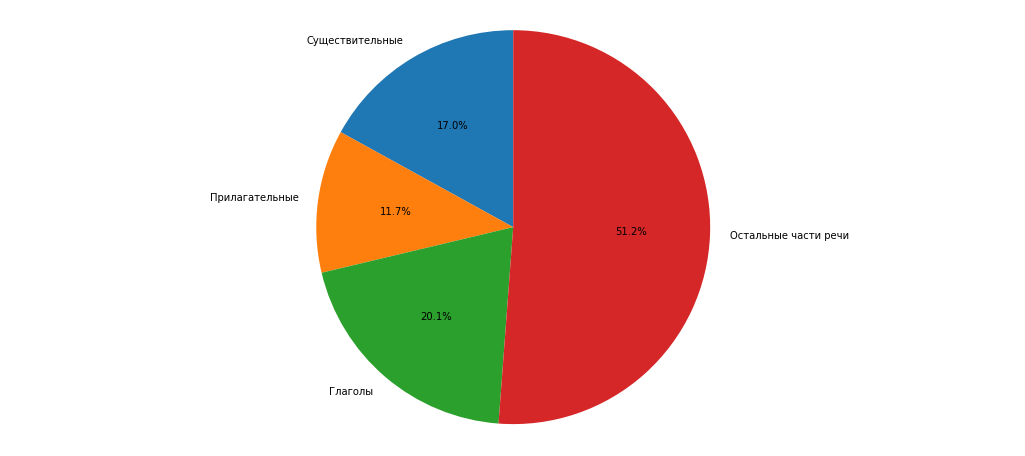

Диаграмма распределения частей речи для книги Прыжок в длину.


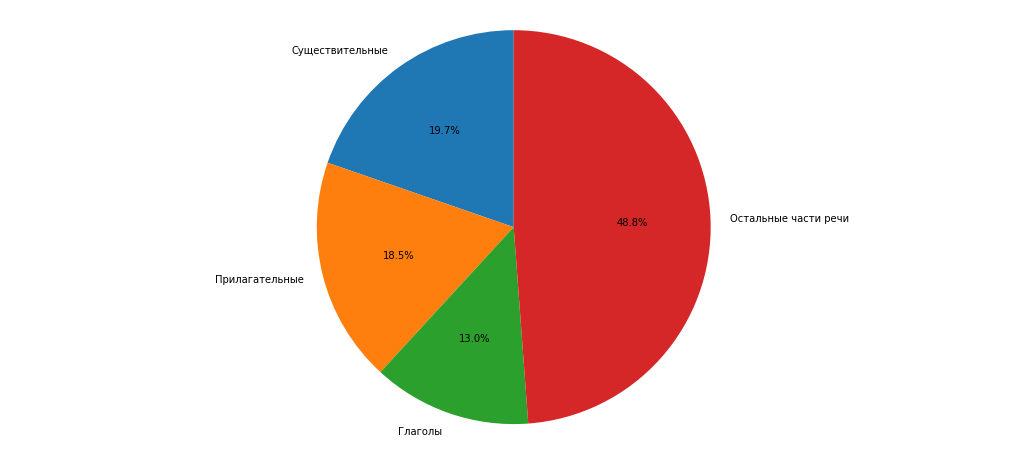

Диаграмма распределения частей речи для книги Холод. Неотвратимая гибель.


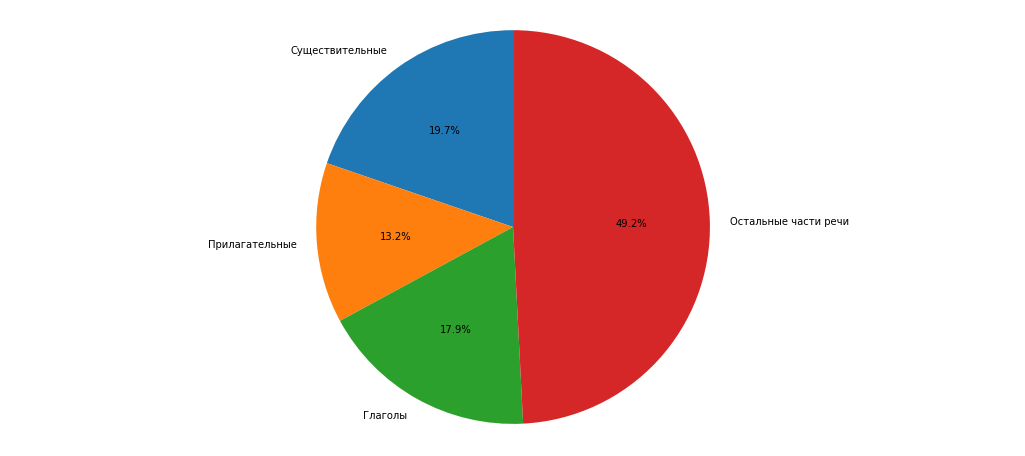

In [10]:
for book in books_info:
    print('Диаграмма распределения частей речи для книги {}.'.format(book['НазваниеКниги']))
    plot_pie(book['НазваниеКниги'])

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9b43198>)

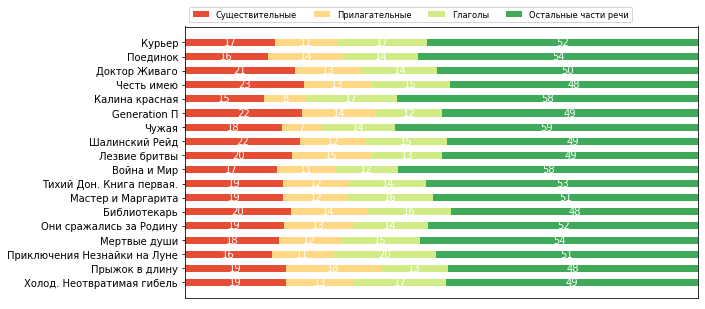

In [11]:
# Строим горизонтальный столбчатый график с разбивкой по категориям
cat_names = ['Существительные', 'Прилагательные', 'Глаголы', 'Остальные части речи']

results = {}

for book in books_info:
    values = []
    values.append(book['ПроцентСуществительных'])
    values.append(book['ПроцентПрилагательных'])
    values.append(book['ПроцентГлаголов'])
    values.append(book['ПроцентОстальныхЧастейРечи'])
    results[book['НазваниеКниги']] = values

def survey(results, cat_names):
    """
    function, which plot map of categories
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    for i, (colname, color) in enumerate(zip(cat_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2
        
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)

    ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    return fig, ax

survey(results, cat_names)